<a href="https://colab.research.google.com/github/cdkontos/MSC-DWS-Machine-Learning-Course-Exercises/blob/main/Final_Project/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from xgboost import XGBRegressor
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Import Data

In [ ]:
train_features = pd.read_csv("train_hh_features.csv")
train_targets = pd.read_csv("train_hh_gt.csv")
test_features = pd.read_csv("test_hh_features.csv")
len(train_features), len(train_targets)

(104234, 104234)

# Merge Data

In [ ]:
df_train = pd.merge(train_features, train_targets, on=['hhid', 'survey_id'])

df_train.shape

(104234, 89)

In [ ]:
df_train.head()

,hhid,com,weight,strata,utl_exp_ppp17,male,hsize,num_children5,num_children10,num_children18,...,consumed4300,consumed4400,consumed4500,consumed4600,consumed4700,consumed4800,consumed4900,consumed5000,survey_id,cons_ppp17
0,100001,1,75,4,594.80627,Female,1,0,0,0,...,No,No,No,Yes,Yes,Yes,Yes,No,100000,25.258402
1,100002,1,150,4,1676.27230,Female,2,0,0,0,...,No,No,No,No,Yes,Yes,No,No,100000,16.996706
2,100003,1,375,4,506.93719,Male,5,0,0,2,...,Yes,No,Yes,Yes,Yes,Yes,No,Yes,100000,13.671848
3,100004,1,375,4,824.61786,Male,5,0,0,1,...,Yes,No,No,No,Yes,Yes,No,No,100000,7.189475
4,100005,1,525,4,351.47644,Male,7,1,0,0,...,No,No,Yes,No,Yes,Yes,Yes,No,100000,12.308855


# Feature Description

In [ ]:
df_train.describe()

,hhid,com,weight,strata,utl_exp_ppp17,hsize,num_children5,num_children10,num_children18,age,...,sfworkershh,region1,region2,region3,region4,region5,region6,region7,survey_id,cons_ppp17
count,104234.000000,104234.0,104234.000000,104234.000000,104149.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,...,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000,104234.000000
mean,222499.501497,1.0,926.357254,4.424813,510.439284,3.611653,0.287872,0.338066,0.571004,52.589414,...,0.320479,0.232736,0.157166,0.106395,0.053150,0.235959,0.098653,0.115941,205059.769365,11.555229
std,83279.120172,0.0,1121.680081,2.429095,437.475542,1.927880,0.561682,0.598281,0.831472,15.732361,...,0.400869,0.422577,0.363959,0.308344,0.224333,0.424599,0.298197,0.320156,81587.641825,10.034225
min,100001.000000,1.0,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000,0.359563
25%,126059.250000,1.0,270.000000,2.000000,190.115800,2.000000,0.000000,0.000000,0.000000,41.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100000.000000,5.439294
50%,219929.500000,1.0,582.000000,5.000000,411.917570,3.000000,0.000000,0.000000,0.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,200000.000000,8.774002
75%,311403.750000,1.0,1128.000000,7.000000,722.440060,5.000000,0.000000,1.000000,1.000000,64.000000,...,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,300000.000000,14.216931
max,337462.000000,1.0,23832.000000,8.000000,5880.471200,21.000000,5.000000,6.000000,6.000000,98.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,300000.000000,236.115680


# Feature Description with ydata-profiling library

In [ ]:
profile = ProfileReport(df_train, title="Profiling Report")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 89/89 [00:37<00:00,  2.40it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Analysis

1. **hhid** represents the unique household identifier.
2. **com** represents the identifier of the specific household member providing data.
3. **weight** indicates the household sampling weight used to represent the broader population.
4. **strata** represents the stratification variable defined during the survey design.
5. **utl_exp_ppp17** represents the household's daily expenditure on utilities, adjusted for Purchasing Power Parity (PPP17).
6. **male** is a binary indicator of whether the household head is male.
7. **hsize** records the total number of members residing in the main household.
8. **num_children5** represents the number of children under 5 years old in the household.
9. **num_children10** represents the number of children aged 5 to 10 years old in the household.
10. **num_children18** represents the number of children aged 10 to 18 years old in the household.
11. **age** displays the age of the household head.
12. **owner** indicates whether the household owns their current dwelling.
13. **water** indicates if the dwelling has access to a formal water supply system.
14. **toilet** indicates the presence of toilet facilities within the dwelling.
15. **sewer** indicates whether the toilet facilities are linked to a public sewer system.
16. **elect** states whether the dwelling has access to electricity.
17. **water_source** records the specific primary sources of drinking water used by the household.
18. **sanitation_source** describes the main type of sanitation facility used by the household.
19. **dweltyp** classifies the specific type of dwelling inhabited by the household.
20. **num_adult_female** counts the number of adult females (aged 18 to 69) in the household.
21. **num_adult_male** counts the number of adult males (aged 18 to 69) in the household.
22. **num_elderly** counts the number of elderly members (aged 70 and above) in the household.
23. **employed** indicates whether the household head is currently employed.
24. **sworkershh** represents the share of all adults in the household who are currently working.
25. **share_secondary** represents the share of adults in the household who have completed a secondary education.
26. **educ_max** indicates the highest level of education attained by any member of the household.
27. **sfworkershh** represents the share of working adults in the household who are in formal employment.
28. **any_nonagric** indicates if any household member is employed in a non-agricultural sector.
29. **sector1d** identifies the employment sector of the household head using 1-digit ISIC codes.
30. The **region{n}** variables (region1 through region7) indicate the specific geographic region of the household.
31. **urban** serves as an indicator of whether the household is located in an urban or rural area.
32. The **consumed{n}** variables indicate whether the household consumed specific items, such as bread, meats, or vegetables.
33. **cons_ppp17** is the target variable, representing the daily per-capita expenditure adjusted for PPP17.

# Preprocess

## Drop hhid, com and survey_id features

These columns don't serve any purpose for the predictions as they are just identifiers.

In [ ]:
train_ids = df_train[['hhid', 'survey_id']]
test_ids = test_features[['hhid', 'survey_id']]
df_train = df_train.drop(columns=['hhid', 'com', 'survey_id'])
test_features = test_features.drop(columns=['hhid', 'com', 'survey_id'])

## Missing Values

In [ ]:
missing_values = df_train.isnull().sum()
missing_only = missing_values[missing_values > 0].sort_values(ascending=False)

missing_only

,0
sector1d,14129
dweltyp,1206
utl_exp_ppp17,85
consumed5000,66
consumed4600,56
consumed4900,56
consumed4800,56
consumed4500,54
consumed4400,52
consumed4700,52


## Handle Employment

In [ ]:
def handle_employment(df):
    df = df.copy()
    mask_unemployed = (df['employed'] == 'Not employed') & (df['sector1d'].isna())
    df.loc[mask_unemployed, 'sector1d'] = 'Unemployed'
    df = df.drop(columns=['employed'])
    return df

Since sector1d contains information about the sector where the leader of the household works and employed contains their employment status, with some modification sector1d can contain the information of employed by adding a new "Unemployed" value and dropping the employed feature.
The sector1d values are not null only when the employed feature has a value of "Employed", so it can be assumed that when it is null they are unemployed and thus the new value can replace that null in the data.

## Handle Missing Values

In [ ]:
def impute_missing_values(df):
    df = df.copy()
    region_cols = ['region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
    df['region_str'] = df[region_cols].astype(str).agg(''.join, axis=1)

    cat_cols = ['dweltyp', 'sector1d', 'educ_max']
    cat_cols += [f'consumed{i}' for i in range(100, 5001, 100)]

    for col in cat_cols:
        if col in df.columns:
            df[col] = df.groupby(['region_str', 'strata'])[col].transform(
                lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
            )

    if 'utl_exp_ppp17' in df.columns:
        df['utl_exp_ppp17'] = df.groupby(['region_str', 'strata'])['utl_exp_ppp17'].transform(
            lambda x: x.fillna(x.median())
        )
        df['utl_exp_ppp17'] = df['utl_exp_ppp17'].fillna(df['utl_exp_ppp17'].median())

    df = df.drop(columns=['region_str'])
    return df

## Handle Dwelling

Since many features depend on the household's location, we fill missing values by grouping data by region and strata. For categorical features and consumption indicators, we use the most frequent value (mode) of the specific area, while for utility expenses (utl_exp_ppp17), we use the median to account for local economic conditions.

In [ ]:
def impute_by_region(df):
    df = df.copy()
    region_cols = ['region1', 'region2', 'region3', 'region4', 'region5', 'region6', 'region7']
    df['region_str'] = df[region_cols].astype(str).agg(''.join, axis=1)
    cat_cols = ['dweltyp', 'sector1d', 'educ_max']
    cat_cols += [f'consumed{i}' for i in range(100, 5001, 100)]

    for col in cat_cols:
        if col in df.columns:
            df[col] = df.groupby(['region_str', 'strata'])[col].transform(
                lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
            )
    if 'utl_exp_ppp17' in df.columns:
        df['utl_exp_ppp17'] = df.groupby(['region_str', 'strata'])['utl_exp_ppp17'].transform(
            lambda x: x.fillna(x.median())
        )
        df['utl_exp_ppp17'] = df['utl_exp_ppp17'].fillna(df['utl_exp_ppp17'].median())

    df = df.drop(columns=['region_str'])
    return df

## Handle Education

The share_secondary feature often has missing values that can be logically inferred from the household leader's maximum education level (educ_max). For individuals who have never attended school or have not completed primary or secondary education, we can safely assume their share of secondary education is zero, while for other missing cases, we use the median to maintain data consistency.

In [ ]:
def handle_education(df):
    df = df.copy()
    low_education_levels = [
        'Never attended', 'Incomplete Primary Education',
        'Complete Primary Education', 'Incomplete Secondary Education'
    ]
    mask_low_edu = df['educ_max'].isin(low_education_levels) & df['share_secondary'].isna()
    df.loc[mask_low_edu, 'share_secondary'] = 0
    df['share_secondary'] = df['share_secondary'].fillna(df['share_secondary'].median())
    return df

## Full Preprocessing

In [ ]:
def full_preprocessing(df):
    df = handle_employment(df)
    df = impute_by_region(df)
    df = handle_education(df)
    return df

df_train_clean = full_preprocessing(df_train)
df_test_clean = full_preprocessing(test_features)

print(f"Total missing values in Train: {df_train_clean.isnull().sum().sum()}")
print(f"Total missing values in Test: {df_test_clean.isnull().sum().sum()}")

Total missing values in Train: 0
Total missing values in Test: 0


# One-Hot Encoding

## Categorical Variable Identification

Categorical columns are identified for encoding. We specifically ensure that the strata variable is included in this list, as it represents a label for specific sampling groups rather than a quantitative measure. Because these values denote distinct survey frameworks with unique characteristics, rather than magnitudes that can be used in mathematical operations, treating them as categorical allows the model to correctly identify each stratum as an independent group.

In [ ]:
categorical_cols = df_train_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if 'strata' not in categorical_cols:
    categorical_cols.append('strata')
categorical_cols

['male',
 'owner',
 'water',
 'toilet',
 'sewer',
 'elect',
 'water_source',
 'sanitation_source',
 'dweltyp',
 'educ_max',
 'any_nonagric',
 'sector1d',
 'urban',
 'consumed100',
 'consumed200',
 'consumed300',
 'consumed400',
 'consumed500',
 'consumed600',
 'consumed700',
 'consumed800',
 'consumed900',
 'consumed1000',
 'consumed1100',
 'consumed1200',
 'consumed1300',
 'consumed1400',
 'consumed1500',
 'consumed1600',
 'consumed1700',
 'consumed1800',
 'consumed1900',
 'consumed2000',
 'consumed2100',
 'consumed2200',
 'consumed2300',
 'consumed2400',
 'consumed2500',
 'consumed2600',
 'consumed2700',
 'consumed2800',
 'consumed2900',
 'consumed3000',
 'consumed3100',
 'consumed3200',
 'consumed3300',
 'consumed3400',
 'consumed3500',
 'consumed3600',
 'consumed3700',
 'consumed3800',
 'consumed3900',
 'consumed4000',
 'consumed4100',
 'consumed4200',
 'consumed4300',
 'consumed4400',
 'consumed4500',
 'consumed4600',
 'consumed4700',
 'consumed4800',
 'consumed4900',
 'consumed50

## One-Hot Encoding

We convert the categorical features into a numerical format using One-Hot Encoding. This expands categories into binary columns, and we use drop_first=True to prevent multicollinearity.

In [ ]:
df_train_encoded = pd.get_dummies(df_train_clean, columns=categorical_cols, drop_first=True)
df_test_encoded = pd.get_dummies(df_test_clean, columns=categorical_cols, drop_first=True)

## Feature Alignment

Because the training and test sets may have different categories present, we reindex the test set to ensure it has the exact same columns as the training set, filling any missing columns with zeros.

In [ ]:
train_cols = [c for c in df_train_encoded.columns if c not in ['cons_ppp17', 'weight']]
df_test_encoded = df_test_encoded.reindex(columns=train_cols, fill_value=0)

## Categorical variable check

In [ ]:
remaining_categorical = df_train_encoded.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Remaining categorical columns in Train: {len(remaining_categorical)}")
print(f"Final Train Features Shape: {df_train_encoded.shape}")
print(f"Final Test Features Shape: {df_test_encoded.shape}")

Remaining categorical columns in Train: 0
Final Train Features Shape: (104234, 124)
Final Test Features Shape: (103023, 122)


# Train-Test Split

## Target and Weight Definition

We separate the target variable (cons_ppp17) and the survey weights from the feature matrix. This ensures the model is trained on the correct labels while accounting for the specific survey design of the dataset.

In [ ]:
X = df_train_encoded[train_cols]
y = df_train_encoded['cons_ppp17']
weights = df_train_encoded['weight']

X.shape, y.shape, weights.shape

((104234, 122), (104234,), (104234,))

The dataset is split into training and validation sets using a 90/10 ratio. This allows us to train the model on a large portion of the data while reserving a subset to evaluate its performance on unseen observations before the final test.

In [ ]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(
    X, y, weights, test_size=0.1, random_state=SEED
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape, w_train.shape, w_val.shape

((93810, 122), (10424, 122), (93810,), (10424,), (93810,), (10424,))

## Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
df_test_scaled = scaler.transform(df_test_encoded)
print(f"Scaled Training Mean: {X_train_scaled.mean():.4f}")
print(f"Scaled Training Std: {X_train_scaled.std():.4f}")

Scaled Training Mean: -0.0000
Scaled Training Std: 1.0000


# Models

## Random Forest

We begin with the Random Forest Regressor, an ensemble method that minimizes error by averaging predictions from multiple decision trees. We use RandomizedSearchCV to optimize its hyperparameters, specifically targeting the Mean Absolute Error (MAE) to ensure robust predictions against outliers.

### Tuning and Evaluation

In [ ]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [2, 5]
}

rf_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=SEED, n_jobs=-1),
    rf_params, n_iter=3, scoring='neg_mean_absolute_error', cv=3, verbose=1, random_state=SEED
)

rf_search.fit(X_train, y_train, sample_weight=w_train)
best_rf = rf_search.best_estimator_

rf_preds = best_rf.predict(X_val)
rf_mae = mean_absolute_error(y_val, rf_preds, sample_weight=w_val)
rf_mape = np.mean(np.abs((y_val - rf_preds) / y_val)) * 100

print(f"Best Random Forest Params: {rf_search.best_params_}")
print(f"RF Validation MAE: {rf_mae:.4f}")
print(f"RF Validation MAPE: {rf_mape:.2f}%")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Random Forest Params: {'n_estimators': 100, 'min_samples_leaf': 5, 'max_depth': None}
RF Validation MAE: 3.2101
RF Validation MAPE: 33.35%


### Random Forest Feature Importance

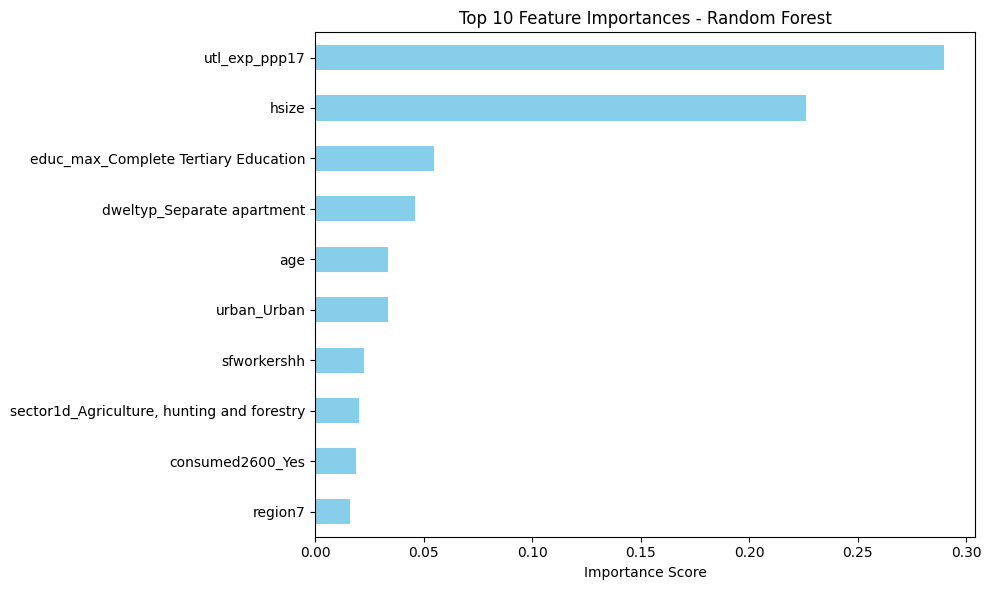

In [ ]:
rf_importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=True).tail(10)

plt.figure(figsize=(10, 6))
rf_importances.plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.savefig('rf_feature_importance.png')

## XGBoost

Next, we apply XGBoost, a gradient boosting algorithm that builds trees sequentially to minimize the residual errors of previous iterations. This model is highly effective for complex datasets and is tuned here to find the optimal balance between learning rate and tree depth.

### Tuning and Evaluation

In [ ]:
xgb_params = {
    'n_estimators': [500, 1000],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05],
    'tree_method': ['hist'],
    'device': ['cuda']
}

xgb_search = RandomizedSearchCV(
    XGBRegressor(random_state=SEED),
    xgb_params, n_iter=3, scoring='neg_mean_absolute_error', cv=3, verbose=1, random_state=SEED
)

xgb_search.fit(X_train, y_train, sample_weight=w_train)
best_xgb = xgb_search.best_estimator_

xgb_preds = best_xgb.predict(X_val)
xgb_mae = mean_absolute_error(y_val, xgb_preds, sample_weight=w_val)
xgb_mape = np.mean(np.abs((y_val - xgb_preds) / y_val)) * 100

print(f"Best XGBoost Params: {xgb_search.best_params_}")
print(f"XGBoost Validation MAE: {xgb_mae:.4f}")
print(f"XGBoost Validation MAPE: {xgb_mape:.2f}%")

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [11:31:45] WARNING: /workspace/src/common/error_msg.cc:62: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


Best XGBoost Params: {'tree_method': 'hist', 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.05, 'device': 'cuda'}
XGBoost Validation MAE: 3.0509
XGBoost Validation MAPE: 30.88%


### Feature Importance

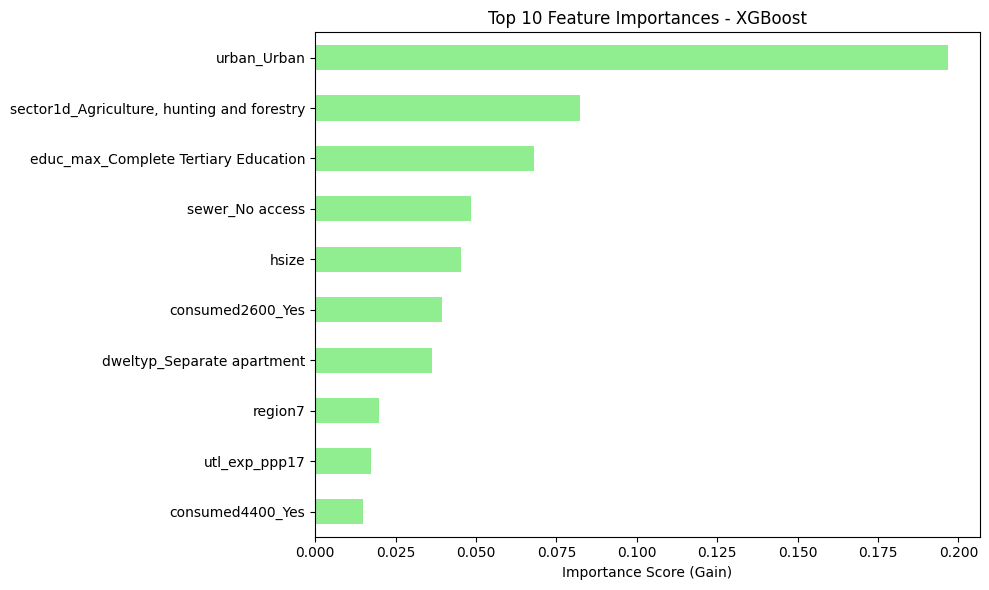

In [ ]:
xgb_importances = pd.Series(best_xgb.feature_importances_, index=X.columns).sort_values(ascending=True).tail(10)

plt.figure(figsize=(10, 6))
xgb_importances.plot(kind='barh', color='lightgreen')
plt.title('Top 10 Feature Importances - XGBoost')
plt.xlabel('Importance Score (Gain)')
plt.tight_layout()
plt.savefig('xgb_feature_importance.png')

## Lasso Regression

Finally, we implement Lasso Regression, which uses an $L_1$ penalty to perform both regularization and automatic feature selection. This linear approach helps identify a sparse set of the most impactful variables by shrinking less relevant coefficients to zero.

In [ ]:
best_lasso = LassoCV(cv=5, random_state=SEED, n_jobs=-1)
best_lasso.fit(X_train_scaled, y_train, sample_weight=w_train)

lasso_preds = best_lasso.predict(X_val_scaled)
lasso_mae = mean_absolute_error(y_val, lasso_preds, sample_weight=w_val)
lasso_mape = np.mean(np.abs((y_val - lasso_preds) / y_val)) * 100

print(f"Best Lasso Alpha: {best_lasso.alpha_}")
print(f"Lasso Validation MAE: {lasso_mae:.4f}")
print(f"Lasso Validation MAPE: {lasso_mape:.2f}%")

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1037.751425488852, tolerance: 610.1605126252094
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 955.3224492077716, tolerance: 618.8808274317879
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16379.153366867453, tolerance: 618.8808274317879
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWa

Best Lasso Alpha: 0.004968064868881013
Lasso Validation MAE: 3.7181
Lasso Validation MAPE: 42.42%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.363e+05, tolerance: 7.683e+02
  model = cd_fast.enet_coordinate_descent(


### Lasso Coefficient Analysis

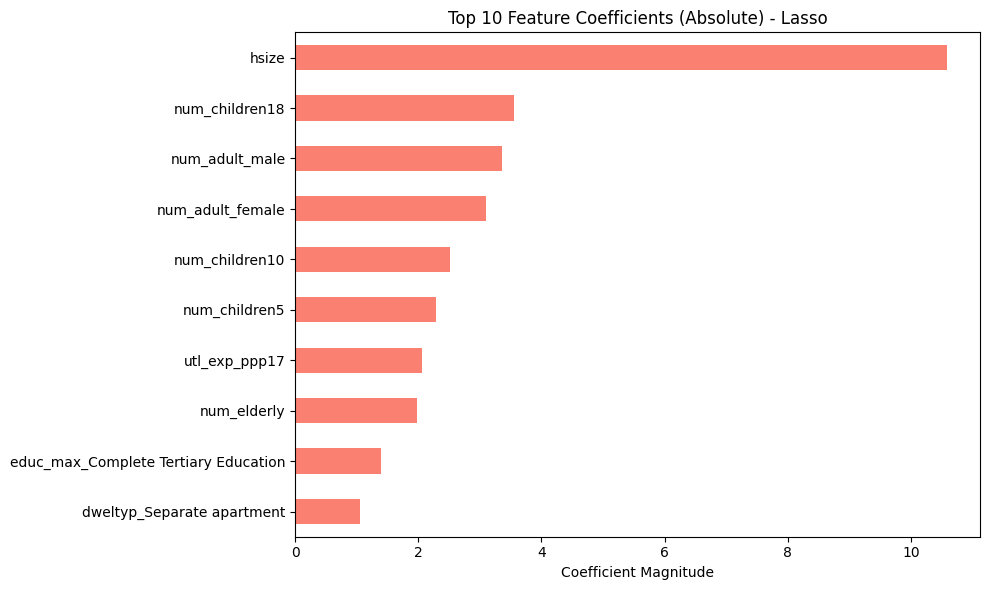

In [ ]:
lasso_coefs = pd.Series(best_lasso.coef_, index=X.columns).abs().sort_values(ascending=True).tail(10)

plt.figure(figsize=(10, 6))
lasso_coefs.plot(kind='barh', color='salmon')
plt.title('Top 10 Feature Coefficients (Absolute) - Lasso')
plt.xlabel('Coefficient Magnitude')
plt.tight_layout()
plt.savefig('lasso_feature_importance.png')

## MLP

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.summary()
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mean_absolute_error',
    metrics=['mape']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        62,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,401 (900.00 KB)

 Trainable params: 228,865 (894.00 KB)

 Non-trainable params: 1,536 (6.00 KB)

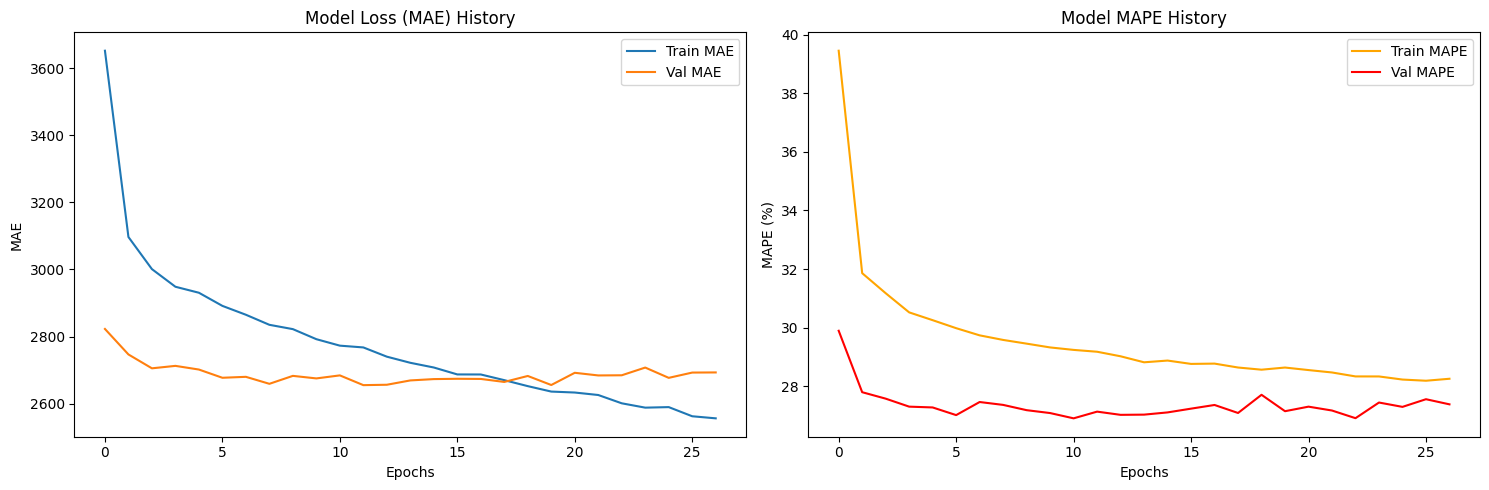

In [ ]:
history = model.fit(
    X_train_scaled, y_train, sample_weight=w_train,
    validation_data=(X_val_scaled, y_val, w_val),
    batch_size=128, epochs=100,
    callbacks=[keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)],
    verbose=0
)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(history.history['loss'], label='Train MAE')
ax1.plot(history.history['val_loss'], label='Val MAE')
ax1.set_title('Model Loss (MAE) History')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('MAE')
ax1.legend()

ax2.plot(history.history['mape'], label='Train MAPE', color='orange')
ax2.plot(history.history['val_mape'], label='Val MAPE', color='red')
ax2.set_title('Model MAPE History')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('MAPE (%)')
ax2.legend()

plt.tight_layout()
plt.savefig('mlp_training_history.png')

## Final Performance Metrics

In [ ]:
preds_rf = best_rf.predict(X_val)
preds_xgb = best_xgb.predict(X_val)
preds_lasso = best_lasso.predict(X_val_scaled)
preds_mlp = model.predict(X_val_scaled).flatten()

results = {
    'Model': ['Random Forest', 'Lasso', 'XGBoost', 'MLP'],
    'MAE': [
        mean_absolute_error(y_val, preds_rf, sample_weight=w_val),
        mean_absolute_error(y_val, preds_lasso, sample_weight=w_val),
        mean_absolute_error(y_val, preds_xgb, sample_weight=w_val),
        mean_absolute_error(y_val, preds_mlp, sample_weight=w_val)
    ],
    'MAPE': [
        np.mean(np.abs((y_val - preds_rf) / y_val)) * 100,
        np.mean(np.abs((y_val - preds_lasso) / y_val)) * 100,
        np.mean(np.abs((y_val - preds_xgb) / y_val)) * 100,
        np.mean(np.abs((y_val - preds_mlp) / y_val)) * 100
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

326/326 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
           Model       MAE       MAPE
0  Random Forest  3.210137  33.351070
1          Lasso  3.718081  42.417018
2        XGBoost  3.050947  30.883016
3            MLP  2.932299  27.132738


## Comparative Visualization

/tmp/ipython-input-1573905732.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')


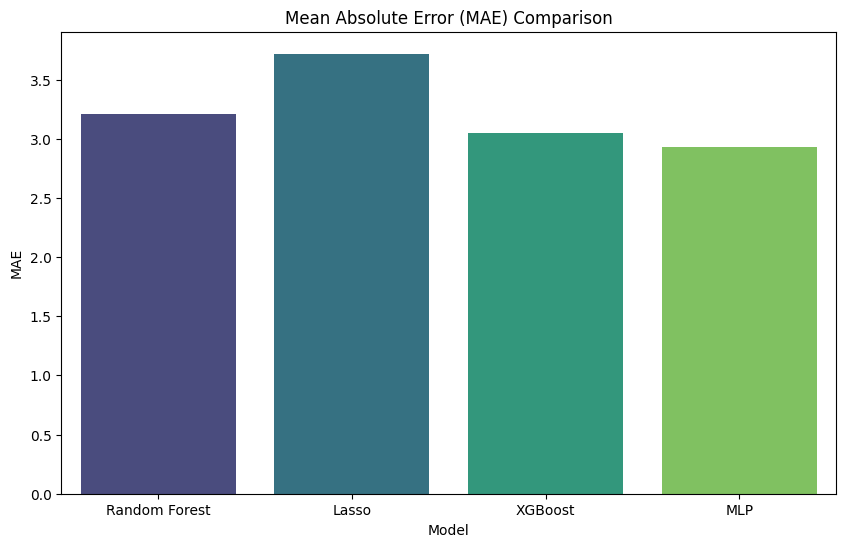

/tmp/ipython-input-1573905732.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='MAPE', data=results_df, palette='magma')


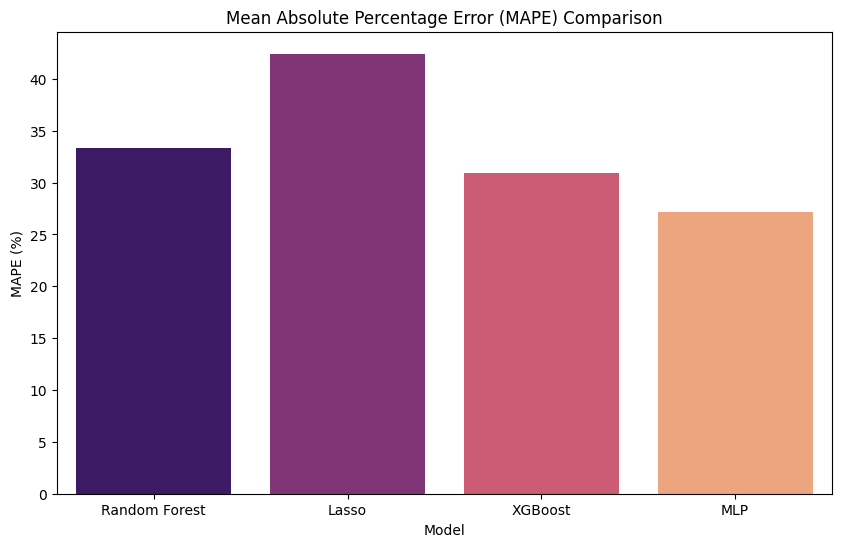

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=results_df, palette='viridis')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAPE', data=results_df, palette='magma')
plt.title('Mean Absolute Percentage Error (MAPE) Comparison')
plt.ylabel('MAPE (%)')
plt.show()

# Final Predictions and Poverty Distribution

Using our best-performing model, we generate consumption predictions for the test dataset. These values are then compared against 19 different poverty thresholds to calculate the headcount ratio (percentage of households below the line) for each survey area.

In [ ]:
final_predictions = model.predict(df_test_scaled).flatten()

submission = pd.DataFrame({
    'survey_id': test_ids['survey_id'],
    'hhid': test_ids['hhid'],
    'cons_ppp17': final_predictions
})
submission.to_csv("predicted_household_consumption.csv", index=False)

thresholds = [3.17, 3.94, 4.60, 5.26, 5.88, 6.47, 7.06, 7.70, 8.40, 9.13, 9.87, 10.70, 11.62, 12.69, 14.03, 15.64, 17.76, 20.99, 27.37]
dist_df = submission.copy()
cols = []

for t in thresholds:
    c = f'pct_hh_below_{t:.2f}'
    dist_df[c] = (dist_df['cons_ppp17'] < t).astype(int)
    cols.append(c)

dist_out = dist_df.groupby('survey_id')[cols].mean().reset_index()
dist_out.to_csv("predicted_poverty_distribution.csv", index=False)

dist_out.head()

3220/3220 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


,survey_id,pct_hh_below_3.17,pct_hh_below_3.94,pct_hh_below_4.60,pct_hh_below_5.26,pct_hh_below_5.88,pct_hh_below_6.47,pct_hh_below_7.06,pct_hh_below_7.70,pct_hh_below_8.40,pct_hh_below_9.13,pct_hh_below_9.87,pct_hh_below_10.70,pct_hh_below_11.62,pct_hh_below_12.69,pct_hh_below_14.03,pct_hh_below_15.64,pct_hh_below_17.76,pct_hh_below_20.99,pct_hh_below_27.37
0,400000,0.036308,0.089339,0.150094,0.214292,0.272588,0.326284,0.374801,0.423897,0.475568,0.525271,0.571792,0.621177,0.669579,0.717633,0.769304,0.816606,0.862954,0.911066,0.959931
1,500000,0.028647,0.072157,0.126880,0.185867,0.243189,0.293386,0.341364,0.394131,0.447949,0.500161,0.551059,0.601402,0.651190,0.702146,0.755118,0.804906,0.853234,0.901971,0.955848
2,600000,0.033379,0.083068,0.136352,0.193932,0.248677,0.297489,0.345103,0.394032,0.447783,0.499342,0.547248,0.598749,0.647912,0.699909,0.752375,0.801567,0.850232,0.901967,0.955134
